In [1]:
# Load contents of the raw EEG time-series data

from scipy.io import loadmat
data = loadmat('Matlab/eeg_data.mat')

In [2]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'eeg_data'])

In [3]:
eeg_data = data['eeg_data']
print(eeg_data.shape) # 1 trial epoch, 24 channels, 724638 time samples

(24, 724638)


In [4]:
# Load channel information

channels = loadmat('Matlab/channel_names.mat')
channels.keys()

dict_keys(['__header__', '__version__', '__globals__', 'channelNames'])

In [5]:
channel_names = channels['channelNames']
print(channel_names) # 24 channels

[[array(['Fp1'], dtype='<U3') array(['Fp2'], dtype='<U3')
  array(['F3'], dtype='<U2') array(['F4'], dtype='<U2')
  array(['C3'], dtype='<U2') array(['C4'], dtype='<U2')
  array(['P3'], dtype='<U2') array(['P4'], dtype='<U2')
  array(['O1'], dtype='<U2') array(['O2'], dtype='<U2')
  array(['F7'], dtype='<U2') array(['F8'], dtype='<U2')
  array(['FC3'], dtype='<U3') array(['FC4'], dtype='<U3')
  array(['P7'], dtype='<U2') array(['P8'], dtype='<U2')
  array(['Fz'], dtype='<U2') array(['Cz'], dtype='<U2')
  array(['Pz'], dtype='<U2') array(['FCz'], dtype='<U3')
  array(['Oz'], dtype='<U2') array(['AFz'], dtype='<U3')
  array(['CPz'], dtype='<U3') array(['POz'], dtype='<U3')]]


In [6]:
# AFz channel visualiztion before processing epochs

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['agg.path.chunksize'] = 10000

In [7]:
eeg_data = eeg_data[:,:716000]
print("Shape after removing the blip at the end: ", eeg_data.shape)

Shape after removing the blip at the end:  (24, 716000)


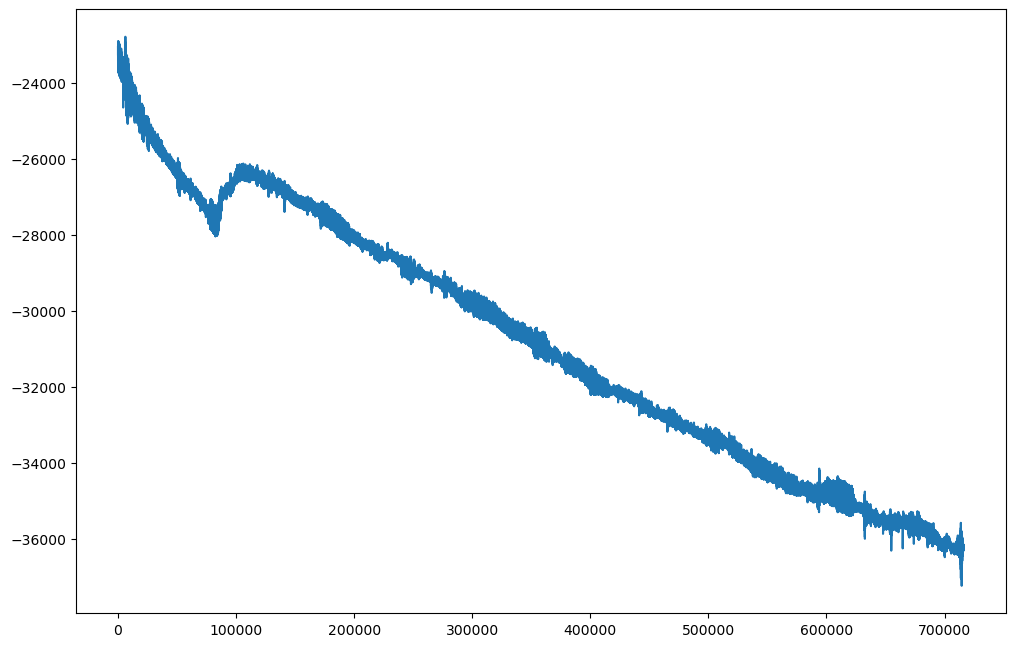

In [9]:
AFz = eeg_data[21] # AFz channel - removed the blip at the end
x = np.arange(1, 716001)
y = AFz
plt.plot(x, y, label = 'before-processing')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.show()

In [10]:
import scipy.signal as sps
from sklearn.decomposition import FastICA

In [11]:
eeg_data = eeg_data.transpose()
print(eeg_data.shape)

(716000, 24)


In [12]:
ica = FastICA(n_components=24) # number of channels
ica.fit(eeg_data)
components = ica.transform(eeg_data)

In [13]:
print(components.shape)

(716000, 24)


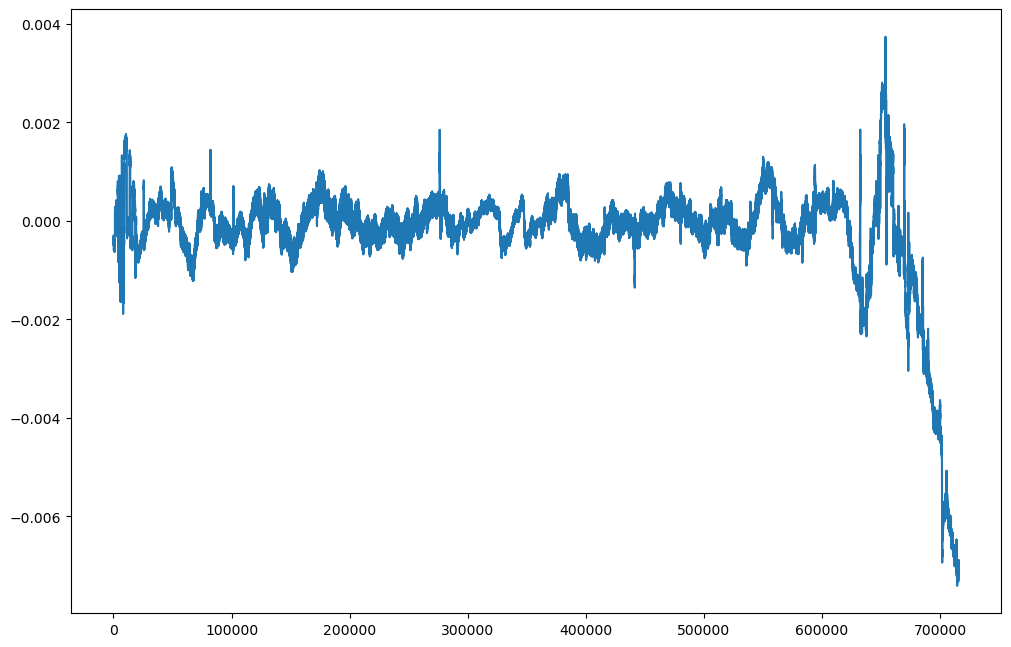

In [17]:
# Plot the components for all channels to see which has eye blinks

comp = components.transpose()[21] 
x = np.arange(1, 716001)
y = comp
plt.plot(x, y, label = 'ica-components')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.show()

In [18]:
# Reconstruct EEG without blinks

restored = ica.inverse_transform(components)
print(restored.shape)

(716000, 24)


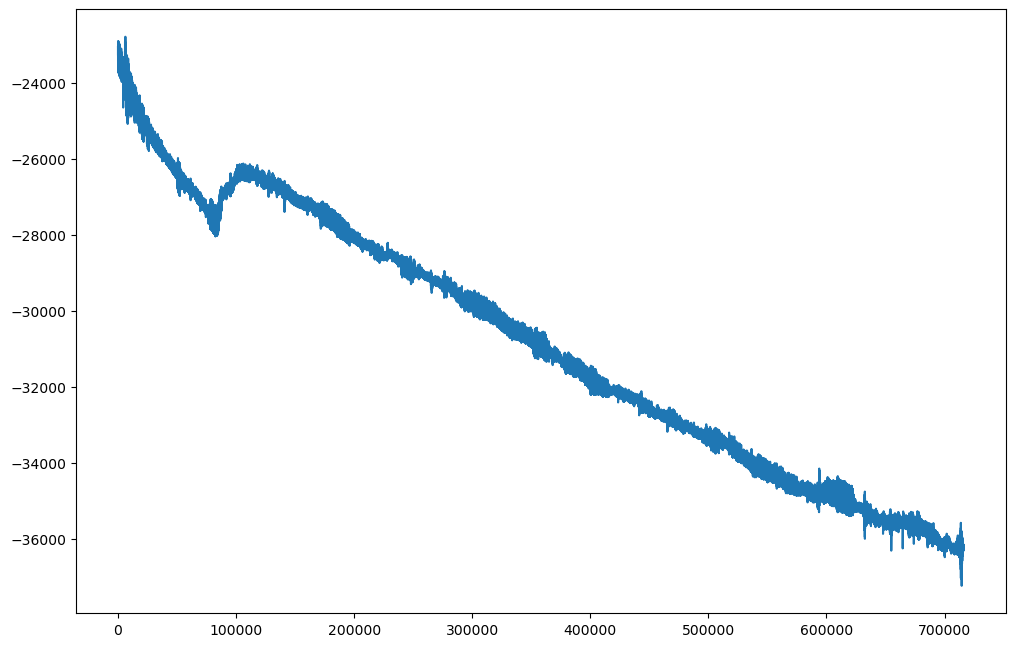

In [19]:
rest = restored.transpose()[21] 
x = np.arange(1, 716001)
y = rest
plt.plot(x, y, label = 'ica-restored')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.show()